In [6]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
import networkx as nx
import matplotlib.pyplot as plt

from mechanisms.revised_mechanism.revised_mechanism import *
from utils.bn.bayesian_network import *
from utils.alphabet import *
from utils.normalize_error_matrix import *

/Users/sandarujayawardana/Documents/minimal-data-ldp/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:

data = pd.read_csv('adult.csv') #'list_attr_celeba.txt') #'adult.csv')
# data = pd.read_csv('list_attr_celeba.txt', sep='\s+', engine='python', skiprows=1)

# Preprocessing steps might include encoding categorical variables,
# handling missing values, etc. Here's a simple placeholder for preprocessing.
data = data.replace('?', pd.NA).dropna()
data.dropna(inplace=True)

# Define the size of the dataset
# num_rows = 50000

# # # Generate random states for each attribute
# data = {
#     "Attribute1": np.random.choice(["State11", "State12", "State13", "State14"], size=num_rows),
#     "Attribute2": np.random.choice(["State21", "State22"], size=num_rows),
#     "Attribute3": np.random.choice(["State31", "State32", "State33"], size=num_rows),
#     "Attribute4": np.random.choice(["State41", "State42", "State43", "State44", "State45", "State46"], size=num_rows),
#     "Attribute5": np.random.choice(["State51", "State52", "State53"], size=num_rows)
# }

# # Create a DataFrame
# data = pd.DataFrame(data)

# data.head()


priority_dict = {}

  0%|          | 8/1000000 [00:01<38:13:41,  7.27it/s] 


Best model structure:  [('marital-status', 'income'), ('marital-status', 'race'), ('gender', 'marital-status'), ('gender', 'income'), ('gender', 'education'), ('gender', 'workclass'), ('education', 'workclass'), ('income', 'education')]
6
6


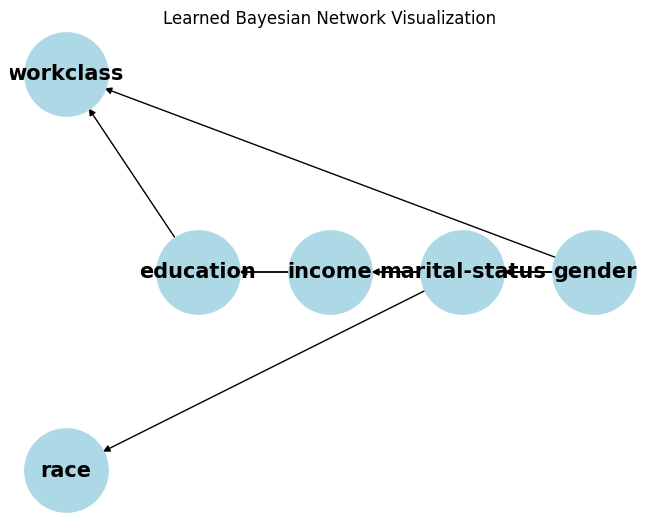

In [8]:
selected_attributes = ['workclass', 'marital-status', 'gender' , 'race', "education", "income"]# ['workclass', 'marital-status', 'gender'] # ["Attribute1", "Attribute2", "Attribute3", "Attribute4", "Attribute5"]# ['workclass', 'marital-status', 'gender' , 'race', "education", "income"] # list(data.columns)[:6]
selected_data = data[selected_attributes]
bn = BN(data=selected_data, priority_dict=priority_dict)
model = bn.get_model()
bn.visualize_structure()

In [4]:
ordered_attribute_list = bn.get_ordered_attribute_list()
print(ordered_attribute_list)
selected_data = data[ordered_attribute_list]
alphabet_dict = get_alphabet_dict_from_data(selected_data)
print(alphabet_dict)
global_alphabet = (create_alphabet_ordered(alphabet_dict, ordered_attribute_list))
parent_node_dict = bn.get_parent_nodes_dict()
print(parent_node_dict)
revised_mechanism = Revised_Mechanism(data=selected_data, model=model, ordered_attribute_list=ordered_attribute_list, parent_node_dict=parent_node_dict, alphabet_dict=alphabet_dict, priority_dict=priority_dict, uniform=False)

['gender', 'marital-status', 'workclass']
{'gender': ['Female', 'Male'], 'marital-status': ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'], 'workclass': ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']}
{'workclass': [], 'marital-status': ['workclass'], 'gender': ['workclass', 'marital-status']}


In [5]:
selected_data.head()

,gender,marital-status,workclass
0,Male,Never-married,Private
1,Male,Married-civ-spouse,Private
2,Male,Married-civ-spouse,Local-gov
3,Male,Married-civ-spouse,Private
5,Male,Never-married,Private


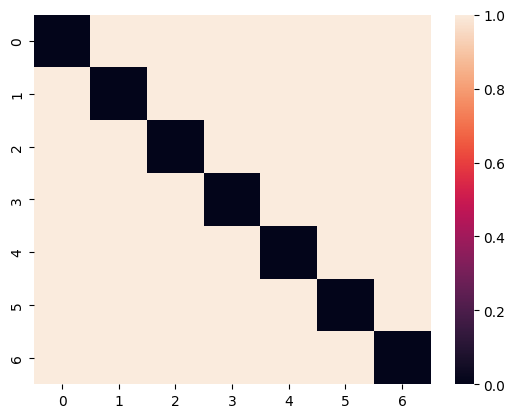

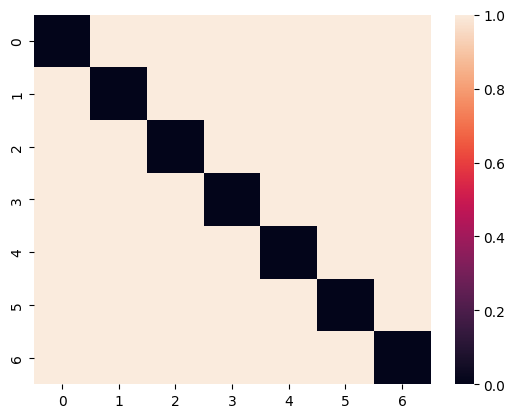

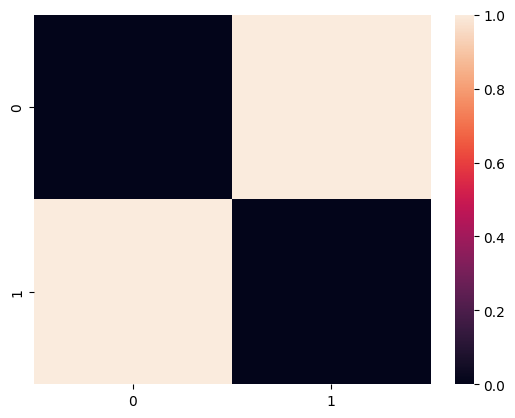

[{'0': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x288181790>},
 {'Federal-gov ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x28b8baeb0>,
  'Local-gov ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x28b840730>,
  'Private ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x28b878340>,
  'Self-emp-inc ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x288246820>,
  'Self-emp-not-inc ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x28b882190>,
  'State-gov ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x1058ca4f0>,
  'Without-pay ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x28815c910>},
 {'Federal-gov Divorced ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x2881c1e80>,
  'Federal-gov Married-AF-spouse ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x28b8e60a0>,
  'Federal-gov Married-civ-spouse ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x28b9afaf0>,
  'Feder

In [6]:
revised_mechanism.get_mechanism()

In [7]:
alphabet_dict

{'gender': ['Female', 'Male'],
 'marital-status': ['Divorced',
  'Married-AF-spouse',
  'Married-civ-spouse',
  'Married-spouse-absent',
  'Never-married',
  'Separated',
  'Widowed'],
 'workclass': ['Federal-gov',
  'Local-gov',
  'Private',
  'Self-emp-inc',
  'Self-emp-not-inc',
  'State-gov',
  'Without-pay']}

In [8]:
from utils.ldp_val_empirical import *

ldp_validator = LDP_Empirical_Validator(mechanism=revised_mechanism, dataset=selected_data, alphabet_dict=alphabet_dict, alphabet_list=global_alphabet, repetion_count=100)

# mat = ldp_validator.run_test(eps=1.5)

# sns.heatmap(mat, vmin=0, vmax=10)
# plt.show()

2
7
7
self.individual_x_index_of_alphabet_dict {'gender': {'Female': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96], 'Male': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97]}, 'marital-status': {'Divorced': [0, 1, 14, 15, 28, 29, 42, 43, 56, 57, 70, 71, 84, 85], 'Married-AF-spouse': [2, 3, 16, 17, 30, 31, 44, 45, 58, 59, 72, 73, 86, 87], 'Married-civ-spouse': [4, 5, 18, 19, 32, 33, 46, 47, 60, 61, 74, 75, 88, 89], 'Married-spouse-absent': [6, 7, 20, 21, 34, 35, 48, 49, 62, 63, 76, 77, 90, 91], 'Never-married': [8, 9, 22, 23, 36, 37, 50, 51, 64, 65, 78, 79, 92, 93], 'Separated': [10, 11, 24, 25, 38, 39, 52, 53, 66, 67, 80, 81, 94, 95], 'Widowed': [12, 13, 26, 27, 40, 41, 54, 55, 68, 69, 82, 83, 96, 97]},

In [9]:
# mat /= np.sum(mat)
# input_marginal_prob_vector = np.sum(mat, axis=1)

# empirical_epsilon_list = []

# def get_empirical_eps(conditional_prob_list_for_given_output):
#     return np.log(max(conditional_prob_list_for_given_output)/min(conditional_prob_list_for_given_output))

# for i in selected_attributes:
#     input_marginals_dict = {}
#     for j in alphabet_dict[i]:
#         marginal = 0
#         for k in ldp_validator.individual_x_index_of_alphabet_dict[i][j]:
#             marginal += input_marginal_prob_vector[k]
#         input_marginals_dict[j] = marginal
#     print(i, input_marginals_dict)
    
#     for output_index in range(np.shape(mat)[1]):
#         conditional_prob_list = []
#         for j in alphabet_dict[i]:
#             joint_prob = 0
#             for k in ldp_validator.individual_x_index_of_alphabet_dict[i][j]:
#                 joint_prob += mat[k][output_index]
#             conditional_prob_list.append(joint_prob/input_marginals_dict[j])
#         empirical_epsilon_list.append(get_empirical_eps(conditional_prob_list))

# filtered_empirical_epsilon_list = [x for x in empirical_epsilon_list if not (math.isnan(x) or math.isinf(x))]
# filtered_empirical_epsilon_list.sort()
# print(filtered_empirical_epsilon_list)
# print(max(filtered_empirical_epsilon_list))

2
7
7
self.individual_x_index_of_alphabet_dict {'gender': {'Female': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96], 'Male': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97]}, 'marital-status': {'Divorced': [0, 1, 14, 15, 28, 29, 42, 43, 56, 57, 70, 71, 84, 85], 'Married-AF-spouse': [2, 3, 16, 17, 30, 31, 44, 45, 58, 59, 72, 73, 86, 87], 'Married-civ-spouse': [4, 5, 18, 19, 32, 33, 46, 47, 60, 61, 74, 75, 88, 89], 'Married-spouse-absent': [6, 7, 20, 21, 34, 35, 48, 49, 62, 63, 76, 77, 90, 91], 'Never-married': [8, 9, 22, 23, 36, 37, 50, 51, 64, 65, 78, 79, 92, 93], 'Separated': [10, 11, 24, 25, 38, 39, 52, 53, 66, 67, 80, 81, 94, 95], 'Widowed': [12, 13, 26, 27, 40, 41, 54, 55, 68, 69, 82, 83, 96, 97]},

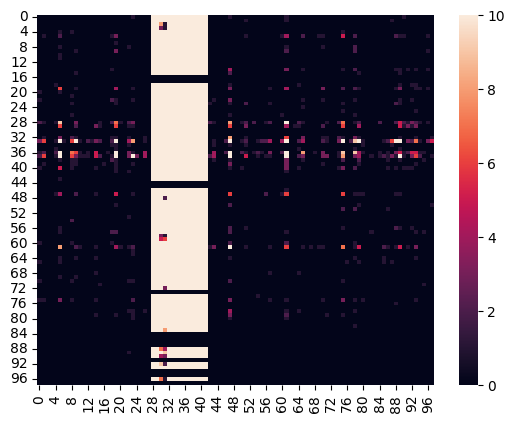

workclass {'Federal-gov': 0.03109106187253992, 'Local-gov': 0.06855070540887176, 'Private': 0.7365220467913848, 'Self-emp-inc': 0.03639821325903321, 'Self-emp-not-inc': 0.08394144442970236, 'State-gov': 0.043032152492149846, 'Without-pay': 0.0004643757463181636}
marital-status {'Divorced': 0.13924638450311794, 'Married-AF-spouse': 0.0007076201848657732, 'Married-civ-spouse': 0.4655919685109019, 'Married-spouse-absent': 0.012206448188934592, 'Never-married': 0.32280748308345497, 'Separated': 0.031201627526425194, 'Widowed': 0.028238468002299767}
gender {'Female': 0.3249524567688293, 'Male': 0.6750475432311706}
Selected Att ['workclass', 'marital-status', 'gender'], [0.30788179933738963, 0.8521602352161981, 2.1173985991649524]
EPS  0.5 [0.30788179933738963, 0.8521602352161981, 2.1173985991649524]
actual 0.5 empirical 2.1173985991649524
2
7
7
self.individual_x_index_of_alphabet_dict {'gender': {'Female': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 4

/var/folders/g2/95j7qkyn1052qk2729bm18cr0000gn/T/ipykernel_16039/900691346.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  return np.log(max(conditional_prob_list_for_given_output)/min(conditional_prob_list_for_given_output))
/var/folders/g2/95j7qkyn1052qk2729bm18cr0000gn/T/ipykernel_16039/900691346.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.log(max(conditional_prob_list_for_given_output)/min(conditional_prob_list_for_given_output))
/Users/sandarujayawardana/Documents/minimal-data-ldp/utils/ldp_val_empirical.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  index_of_x_i += self.alphabet_dict[i].index(x[index_i])*self.base_values[index_i]


KeyboardInterrupt: 

In [12]:
__eps_array = np.arange(8) * 0.5 + 0.5

final_result_values = []

for __eps in __eps_array:  
    for __rep in range(5):
        ldp_validator = LDP_Empirical_Validator(mechanism=revised_mechanism, dataset=selected_data, alphabet_dict=alphabet_dict, alphabet_list=global_alphabet, repetion_count=10000)

        mat = ldp_validator.run_test(eps=__eps) #1.5)

        sns.heatmap(mat, vmin=0, vmax=10)
        plt.show()

        mat /= np.sum(mat)
        input_marginal_prob_vector = np.sum(mat, axis=1)

        # empirical_epsilon_list = []
        max_empirical_epsilon_list = []

        def get_empirical_eps(conditional_prob_list_for_given_output):
            return np.log(max(conditional_prob_list_for_given_output)/min(conditional_prob_list_for_given_output))
    
        for i in selected_attributes:
            empirical_epsilon_list = []
            input_marginals_dict = {}
            for j in alphabet_dict[i]:
                marginal = 0
                for k in ldp_validator.individual_x_index_of_alphabet_dict[i][j]:
                    marginal += input_marginal_prob_vector[k]
                input_marginals_dict[j] = marginal
            print(i, input_marginals_dict)
            
            for output_index in range(np.shape(mat)[1]):
                conditional_prob_list = []
                for j in alphabet_dict[i]:
                    joint_prob = 0
                    for k in ldp_validator.individual_x_index_of_alphabet_dict[i][j]:
                        joint_prob += mat[k][output_index]
                    conditional_prob_list.append(joint_prob/input_marginals_dict[j])
                empirical_epsilon_list.append(get_empirical_eps(conditional_prob_list))
            max_empirical_epsilon_list.append(max([x for x in empirical_epsilon_list if not (math.isnan(x) or math.isinf(x))]))
        # filtered_empirical_epsilon_list = [x for x in empirical_epsilon_list if not (math.isnan(x) or math.isinf(x))]
        filtered_empirical_epsilon_list = [x for x in max_empirical_epsilon_list if not (math.isnan(x) or math.isinf(x))]
        filtered_empirical_epsilon_list.sort()
        print(f"Selected Att {selected_attributes}, {max_empirical_epsilon_list}")
        print("EPS ", __eps, filtered_empirical_epsilon_list)

        final_result_values.append(f"actual {__eps} empirical {max(filtered_empirical_epsilon_list)}")
        print(final_result_values[-1])
    print(final_result_values)

In [ ]:
actual 0.5 empirical 2.205452164331841
actual 1.0 empirical 2.1276819621130114
actual 1.5 empirical 2.3286669974714527

['actual 0.0 empirical 0.8533196091765968', 'actual 0.5 empirical 0.7093718414189658', 'actual 1.0 empirical 1.3522192847461865', 'actual 1.5 empirical 1.5391425599967785', 'actual 2.0 empirical 2.3812738897123857', 'actual 2.5 empirical 3.8405215235353247', 'actual 3.0 empirical 3.9333548062203505', 'actual 3.5 empirical 4.911411691595611', 'actual 4.0 empirical 5.843278813684558', 'actual 4.5 empirical 5.9866452606720335']


['actual 0.0 empirical 0.42194967378984377', 'actual 0.5 empirical 0.8766937931181865', 'actual 1.0 empirical 1.7975879343189896', 'actual 1.5 empirical 2.13594791025867', 'actual 2.0 empirical 3.554319783763848', 'actual 2.5 empirical 4.028893797159548', 'actual 3.0 empirical 5.683030924291348', 'actual 3.5 empirical 5.751898709781513', 'actual 4.0 empirical 5.790853016344708', 'actual 4.5 empirical 5.925782515268332']

['actual 0.0 empirical 4.529008825022526', 'actual 0.5 empirical 4.529008825022525', 'actual 1.0 empirical 5.423090277308936', 'actual 1.5 empirical 6.4891574377963', 'actual 2.0 empirical 5.796010257236356', 'actual 2.5 empirical 7.3690004263642495', 'actual 3.0 empirical 8.280916907024356', 'actual 3.5 empirical 8.202345450891684', 'actual 4.0 empirical 10.014724207322475', 'actual 4.5 empirical 9.143328795356211']

['actual 0.0 empirical 2.3903353879904308', 'actual 0.5 empirical 0.6053660837668677', 'actual 1.0 empirical 1.110725387261054', 'actual 1.5 empirical 1.6625647199789275', 'actual 2.0 empirical 2.186200615880348', 'actual 2.5 empirical 2.8242655855511485', 'actual 3.0 empirical 3.3597464303461786', 'actual 3.5 empirical 3.935133298927765', 'actual 4.0 empirical 4.535209315930628', 'actual 4.5 empirical 5.155475031254801']

actual 0.0 empirical 4.361580943513591
actual 0.5 empirical 5.222156005582471
actual 1.5 empirical 5.9752398862489615
actual 2.0 empirical 6.122903909211847
actual 2.5 empirical 7.134504820890327
actual 3.0 empirical 7.221516197879957
actual 3.5 empirical 8.277824979243007


EPS_ARRAY = np.arange(10)*0.8
error_list = []
# ALL_ALPHABET = (create_alphabet(alphabet_dict)).tolist()
# print(len(ALL_ALPHABET), ALL_ALPHABET)
normalize_error_matrix = Normalize_error_matrix(attribute_list=selected_attributes, alphabet=[], priority_dict=priority_dict, alphabet_dict=alphabet_dict, err_type="0_1", skip_error_matrix=True)
datacount = len(selected_data)
for eps in EPS_ARRAY:
    print("eps ", eps)
    __perturbed_value_list = []
    __tot_error = 0
    for index, row in selected_data.iterrows():
        row_as_list = row.tolist()
        # print("eeee")
        actual_value = list_to_string(row_as_list)
        # print("ccc")
        __perturbed_value_list.append(revised_mechanism.gen_random_output(actual_value=actual_value, eps=eps))
        # print("__perturbed_value_list", __perturbed_value_list)
        # print("orig", row_as_list, __perturbed_value_list[-1])
        # print("aaa")
        __error = normalize_error_matrix.get_value_error_temp(actual=row_as_list, perturbed=__perturbed_value_list[-1])
        # print("bbbb")
        __tot_error += __error
    error_list.append(__tot_error/datacount)

plt.plot(EPS_ARRAY, error_list)
# ax2.set_ylabel("Information Leakage (Bits)")
# plt.legend(lagends)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()


SyntaxError: invalid syntax (1912255540.py, line 1)

In [1]:
from utils import simpleinfotheory
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# num_rows = 50000

# # # Generate random states for each attribute
# data = {
#     "Attribute1": np.random.choice(["State11", "State12", "State13", "State14"], size=num_rows),
#     "Attribute2": np.random.choice(["State21", "State22"], size=num_rows),
#     "Attribute3": np.random.choice(["State31", "State32", "State33"], size=num_rows),
#     "Attribute4": np.random.choice(["State41", "State42", "State43", "State44", "State45", "State46"], size=num_rows),
#     "Attribute5": np.random.choice(["State51", "State52", "State53"], size=num_rows)
# }

# # Create a DataFrame
# data = pd.DataFrame(data)

data = pd.read_csv('adult.csv') #'list_attr_celeba.txt') #'adult.csv')
# data = pd.read_csv('list_attr_celeba.txt', sep='\s+', engine='python', skiprows=1)

# Preprocessing steps might include encoding categorical variables,
# handling missing values, etc. Here's a simple placeholder for preprocessing.
data = data.replace('?', pd.NA).dropna()
data.dropna(inplace=True)

selected_attributes = ['marital-status', 'gender', 'workclass', 'race', "education", "income"] # ["Attribute1", "Attribute2", "Attribute3", "Attribute4", "Attribute5"]# ['workclass', 'marital-status', 'gender' , 'race', "education", "income"] # list(data.columns)[:6]
data = data[selected_attributes]

label_encoder = LabelEncoder()

# Encode each column
encoded_df = data.apply(label_encoder.fit_transform)
data = encoded_df

/var/folders/g2/95j7qkyn1052qk2729bm18cr0000gn/T/ipykernel_42039/2477814304.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
simpleinfotheory.multivariate_mutual_information(xn=data.values[:,0], Yn=data.values[:,1:])

sorted_pair_wise_mi_list  [0, 4, 3, 1, 2]
index_i 0
total_mutual_info  0.16589775376034988
index_i 1
total_mutual_info  0.2905470743924887
index_i 2
total_mutual_info  0.33145273134527375
index_i 3
total_mutual_info  0.33145273134527375


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {
    'Attribute1': ['State1', 'State2', 'State3', 'State1', 'State2'],
    'Attribute2': ['State2', 'State3', 'State1', 'State2', 'State1']
}
df = pd.DataFrame(data)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each column
encoded_df = df.apply(label_encoder.fit_transform)

print(encoded_df)


   Attribute1  Attribute2
0           0           1
1           1           2
2           2           0
3           0           1
4           1           0
